In [24]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection  import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_percentage_error

df = pd.read_csv("TV_Shows.csv")
print("Размер данных")
print(df.shape)
print("Информация")
print(df.info())

Размер данных
(9689, 32)
Информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9689 entries, 0 to 9688
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cobra Kai    9689 non-null   object
 1   Lupin        7556 non-null   object
 2   12 Monkeys   5946 non-null   object
 3   Sherlock     4666 non-null   object
 4   Unnamed: 4   3678 non-null   object
 5   Unnamed: 5   2837 non-null   object
 6   Unnamed: 6   2197 non-null   object
 7   Unnamed: 7   1664 non-null   object
 8   Unnamed: 8   1231 non-null   object
 9   Unnamed: 9   887 non-null    object
 10  Unnamed: 10  644 non-null    object
 11  Unnamed: 11  464 non-null    object
 12  Unnamed: 12  348 non-null    object
 13  Unnamed: 13  272 non-null    object
 14  Unnamed: 14  196 non-null    object
 15  Unnamed: 15  141 non-null    object
 16  Unnamed: 16  95 non-null     object
 17  Unnamed: 17  66 non-null     object
 18  Unnamed: 18  52 non-null     obj

In [25]:
print("Строки")
print(df.head(5))

Строки
       Cobra Kai          Lupin   12 Monkeys          Sherlock  \
0           Lost      Jack Ryan    The Flash   Game of thrones   
1  Sex Education      Dr. House      Kingdom  The Walking Dead   
2          Ozark  Sex Education  Constantine          Preacher   
3         Naruto            NaN          NaN               NaN   
4  Sex Education            NaN          NaN               NaN   

       Unnamed: 4  Unnamed: 5 Unnamed: 6 Unnamed: 7     Unnamed: 8  \
0  House of Cards  12 Monkeys    Vikings     Fringe  The Mentalist   
1             NaN         NaN        NaN        NaN            NaN   
2         Vikings    The Tick        NaN        NaN            NaN   
3             NaN         NaN        NaN        NaN            NaN   
4             NaN         NaN        NaN        NaN            NaN   

     Unnamed: 9  ... Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25  \
0  The Alienist  ...         NaN         NaN         NaN         NaN   
1           NaN  ...         Na

In [26]:
# Подсчёт длины транзакции (кол-во непустых значений в строке)
transaction_lengths = df.notna().sum(axis=1)

# Добавим этот столбец в датафрейм (для наглядности)
df['transaction_length'] = transaction_lengths

# Посмотрим базовую статистику
print(transaction_lengths.describe())

count    9689.000000
mean        4.414078
std         3.597709
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        32.000000
dtype: float64


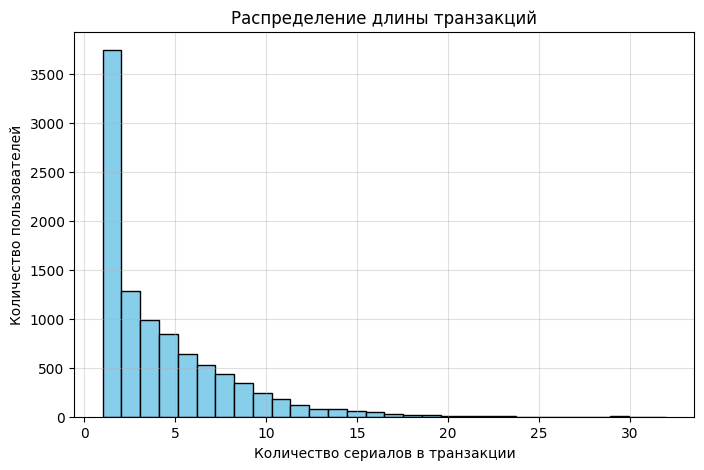

In [27]:
plt.figure(figsize=(8,5))
plt.hist(transaction_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение длины транзакций')
plt.xlabel('Количество сериалов в транзакции')
plt.ylabel('Количество пользователей')
plt.grid(alpha=0.4)
plt.show()

In [28]:
# Объединяем все значения в один Series и убираем NaN
all_items = pd.Series(df.drop(columns='transaction_length').values.ravel()).dropna()

# Преобразуем в множество уникальных сериалов
unique_items = sorted(all_items.unique())

print(f"Всего уникальных сериалов: {len(unique_items)}")
print(unique_items[:30])  # покажем первые 30 названий

Всего уникальных сериалов: 156
['12 Monkeys', '24', 'Absentia', 'Alice in Borderland', 'Altered Carbon', 'American Gods', 'Another Life', 'Archer', 'Arrow', 'Atypical', 'Banshee', 'Berlin Station', 'Better Call Saul', 'Big Little Lies', 'Billions', 'Black Clover', 'Bojack Horseman', 'Breaking Bad', 'Brooklyn Nine Nine', 'Chernobyl', 'Cobra Kai', 'Constantine', 'Daredevil', 'Dark', 'Death Note', 'Deception', 'Demon Slayer', 'Designated Survivor', 'Dexter', 'Doctor Who']


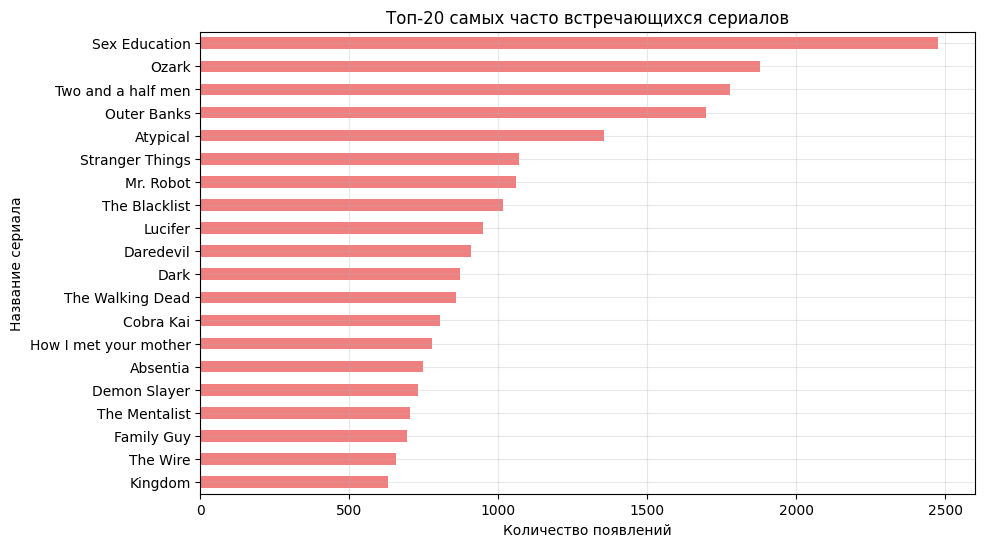

In [29]:
top_items = all_items.value_counts().head(20)

plt.figure(figsize=(10,6))
top_items.plot(kind='barh', color='lightcoral')
plt.title('Топ-20 самых часто встречающихся сериалов')
plt.xlabel('Количество появлений')
plt.ylabel('Название сериала')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.show()

In [30]:
print("Пропущенные значения по столбцам:")
print(df.isna().sum())

Пропущенные значения по столбцам:
Cobra Kai                0
Lupin                 2133
12 Monkeys            3743
Sherlock              5023
Unnamed: 4            6011
Unnamed: 5            6852
Unnamed: 6            7492
Unnamed: 7            8025
Unnamed: 8            8458
Unnamed: 9            8802
Unnamed: 10           9045
Unnamed: 11           9225
Unnamed: 12           9341
Unnamed: 13           9417
Unnamed: 14           9493
Unnamed: 15           9548
Unnamed: 16           9594
Unnamed: 17           9623
Unnamed: 18           9637
Unnamed: 19           9651
Unnamed: 20           9660
Unnamed: 21           9671
Unnamed: 22           9675
Unnamed: 23           9681
Unnamed: 24           9682
Unnamed: 25           9682
Unnamed: 26           9683
Unnamed: 27           9684
Unnamed: 28           9685
Unnamed: 29           9688
Unnamed: 30           9688
Unnamed: 31           9688
transaction_length       0
dtype: int64
